## 오버 샘플링
- 소수 클래스의 샘플을 증가시켜 마이너 클래스와 메이저 클래스의 샘플 크기를 동일하게 만드는 기법 
- 랜덤 오버샘플링(소수 샘플 복제)은 동일한 정보를 복사하여 오버피팅을 유발할 수 있음 

<img src='https://github.com/mjaemin/ADP/blob/main/class101/%EC%98%A4%EB%B2%84%EC%83%98%ED%94%8C%EB%A7%81_%EC%96%B8%EB%8D%94%EC%83%98%ED%94%8C%EB%A7%81%20%EC%86%8C%EA%B0%9C.png?raw=true' width=500/>


### SMOTE(Synthetic Minority Over-sampling Technique)
- 소수 클래스의 기존 샘플을 사용하여 새로운 합성 관찰을 생성 하는 오버 샘플링 기법 소수 클래스에 대한 선형 보간법으로 가상 훈련 기록을 생성. 
- 합성 훈련 기록은 소수 클래스의 각 예에 대해 k-최근접 이웃 중 하나 이상을 무작위로 선택하여 생성.
- 오버샘플링 과정을 거친 후 데이터를 재구성하고 처리된 데이터에 대해 여러 분류 모델을 적용할 수 있음
- 데이터의 특성에 따라 다르겠지만, 빅데이터 분석을 위해서는 많은 데이터 확보가 효과적이므로 오버샘플링 기법을 적용하는 것이 좋음.
- 기존의 데이터가 적은 새로운 사례의 데이터에서 사용하기 어려움.

<img src='https://github.com/mjaemin/ADP/blob/main/class101/SMOTE.png?raw=true' width=500/>


In [1]:
import pandas as pd

credit = pd.read_csv("../data/credit_final.csv")
X = credit.drop(['credit.rating'],axis=1)
y = credit['credit.rating']


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=1004)


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [4]:
X_train.shape

(700, 20)

In [5]:
y_train.value_counts()

1    490
0    210
Name: credit.rating, dtype: int64

In [6]:
from imblearn.over_sampling import SMOTE
# 모델설정
sm = SMOTE( k_neighbors=5)

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

After OverSampling, the shape of train_X: (980, 20)
After OverSampling, the shape of train_y: (980,) 

After OverSampling, counts of label '1': 490
After OverSampling, counts of label '0': 490


In [7]:
from sklearn.svm import SVC
svc1 = SVC(C = 20.00, gamma=0.1, probability=True)
svc1.fit(X_train, y_train)

svc2 = SVC(C = 20.00, gamma=0.1, probability=True)
svc2.fit(X_resampled, y_resampled)


SVC(C=20.0, gamma=0.1, probability=True)

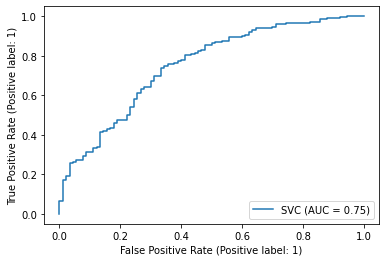

In [8]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc1, X_test, y_test)

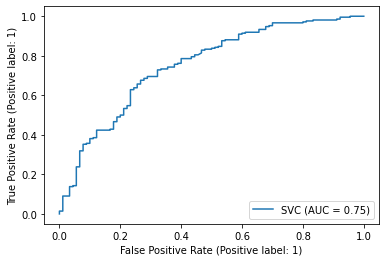

In [9]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc2, X_test, y_test)